In [27]:
import numpy as np
import matplotlib.pylab as pl
import random
import pandas as pd

In [28]:
def Huber(X, y, W, reg, sigma):
    '''Input: 
            X: training data, shape is (N, D+1), the extra one dimenstion is use to add bias, all equal to 1
            y: training data, shape is (N, 1)
            W: weight, shape is (D+1, 1), the extra one dimenstion is bias b
            reg: regularization strength
            sigma: a threshold use to penalize outliers
       Output:
            loss: scala
            dW: shape as W
    '''
    N, D = X.shape
    y_pred = X.dot(W)
    res = y - y_pred
    res_abs = np.abs(res)

    idx_l = np.argwhere(res_abs<=sigma)
    idx_g = np.argwhere(res_abs>sigma)

    loss = 0.5*np.sum(res[idx_l[:,0]]**2) + sigma * np.sum(res_abs[idx_g[:,0]] - 0.5*sigma) + 0.5 * reg * np.sum(W**2)
    loss /= N
    
    dW = -X[idx_l[:,0]].T.dot(res[idx_l[:,0]]) - sigma * np.sum(X[idx_g[:,0]]*np.sign(res[idx_g[:,0]]), axis=0).reshape(-1,1)
    dW = 1./N * dW + reg * W

    return loss, dW

In [29]:
def train_Huber(X, y, sigma, learning_rate, reg, num_iters, batch_size, verbose=False):
    N, D = X.shape
    # initialize W
    W = 0.001 * np.random.randn(D, 1)
    # save loss 
    loss_history = []
    
    for it in range(num_iters):
        
        mask = np.random.choice(N, batch_size)
        X_batch = X[mask]
        y_batch = y[mask]
        
        loss, dW = Huber(X_batch, y_batch, W, reg, sigma)
#         print loss.shape
        loss_history.append(float(loss))
        # update W
        W += - learning_rate*dW
        # verbose
        if verbose and it % 100 == 0:
            print 'iteration %d / %d: loss %f' % (it, num_iters, loss)
        
    return loss_history, W

In [30]:
def load_data(PATH):
    data =np.loadtxt(PATH, skiprows=1)
    X, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)
    return X, y

In [31]:
PATH = './GPA.txt'
X, y = load_data(PATH)
# add a dimension to X, instead of use bias
X = np.hstack((X, np.ones((X.shape[0],1))))
print X.shape

sigma = 2
learning_rate = 1e-3
reg = 1e-5
num_iters = 1000
batch_size = 1
loss_history, W = train_Huber(X, y, sigma, learning_rate, reg, num_iters, batch_size, verbose=True)

(105, 2)
iteration 0 / 1000: loss 4.770910
iteration 100 / 1000: loss 0.981346
iteration 200 / 1000: loss 0.158506
iteration 300 / 1000: loss 0.000802
iteration 400 / 1000: loss 0.146144
iteration 500 / 1000: loss 0.133241
iteration 600 / 1000: loss 0.128251
iteration 700 / 1000: loss 0.001823
iteration 800 / 1000: loss 0.000040
iteration 900 / 1000: loss 0.010112


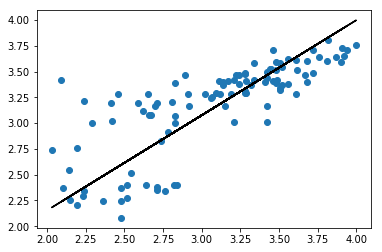

In [32]:
y_p = X.dot(W)
pl.plot(X[:,0], y, 'o')
pl.plot(X[:,0], y_p, 'k-')
pl.show()

In [33]:
print W

[[0.92182326]
 [0.31002542]]


# $y = 0.92x + 0.31$

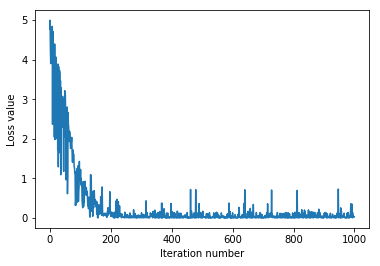

In [34]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [ ]:
def LS(X, y, W):
    '''Input: 
            X: training data, shape is (N, D+1), the extra one dimenstion is use to add bias, all equal to 1
            y: training data, shape is (N, 1)
            W: weight, shape is (D+1, 1), the extra one dimenstion is bias b
       Output:
            loss: scala
            dW: shape as W
    '''
    N, D = X.shape
    y_pred = X.dot(W)
    loss = .5/N * np.sum((y - y_pred)**2)
    dW = -1./N * X.T.dot(y - y_pred)
    return loss, dW

In [ ]:
def train_LS(X, y, learning_rate, num_iters, batch_size, verbose=False):
    N, D = X.shape
    # initialize W
    W = 0.001 * np.random.randn(D, 1)
    # save loss 
    loss_history = []
    
    for it in range(num_iters):
        
        mask = np.random.choice(N, batch_size)
        X_batch = X[mask]
        y_batch = y[mask]
        
        loss, dW = gradient(X_batch, y_batch, W)
#         print loss.shape
        loss_history.append(float(loss))
        # update W
        W += - learning_rate*dW
        # verbose
        if verbose and it % 100 == 0:
            print 'iteration %d / %d: loss %f' % (it, num_iters, loss)
        
    return loss_history, W